In [1]:
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
from astropy.io import fits

In [3]:
from astropy.coordinates import SkyCoord

In [4]:
import astropy.wcs.wcs as wcs
import matplotlib.pyplot as plt

# Initialize data directory

In [5]:
path = "../../Data/"

In [6]:
!ls $path/Subaru_data

G.cat               I.fits.fz           R.shape             Rshape_processed.h5
G.fits              I_cropped.fits      RGB_Subaru          crop_fits.md
G.fits.fz           MACS1752.png        RGB_Subaru.fits     crop_fits.sh
G_cropped.fits      R.cat               RGB_Subaru.png      p358Dust.fits
I.cat               R.fits              RGB_Subaru_2d.fits
I.fits              R.fits.fz           R_cropped.fits


# Subaru data

X_world and Y_world

1 extract binary table     
2 extract WCS from header    
3 compute RA and DEC    
4 figure out what the flags mean   
5 ask James about what the DE means ... 

In [7]:
dataPath = path + "Subaru_data/" 

In [8]:
Rshape = fits.open(dataPath + "R.shape")

In [9]:
Rshape[1].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                   50 /Number of bytes per row                         
NAXIS2  =               100680 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                   13 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [15]:
Rshapes = pd.DataFrame(Rshape[1].data.tolist(), 
                       columns=Rshape[1].data.dtype.names)

In [16]:
Rshapes

,ID,X,Y,E1,E2,DE,FLUX_RADIUS,A,B,THETA,STATUS,RA,DEC
0,1,5543.359375,1295.416504,0.000000,0.000000,99.000000,58.888725,0.000000,0.000000,0.000000,0,268.146515,44.363667
1,2,5644.988770,1175.160645,0.000000,0.000000,99.000000,15.366167,0.000000,0.000000,0.000000,0,268.138245,44.356590
2,3,6820.540527,588.859131,-0.093869,-0.093595,0.449270,0.792836,0.344936,0.264192,1.962765,5,268.046021,44.323761
3,4,6819.238281,581.310303,0.973138,0.228374,0.000091,7.927206,137734.828125,29.187920,0.115253,1,268.044861,44.323975
4,5,6777.760742,617.667603,0.295300,-0.389379,0.050515,2.512599,1.023901,0.351672,2.680618,1,268.049377,44.325378
5,6,6877.063965,636.635010,0.282016,-0.084433,0.116149,3.925538,1.718029,0.936559,2.996144,1,268.041595,44.326443
6,7,6782.004395,635.570374,0.049884,0.223103,0.122168,6.007818,6.274818,3.939663,0.675412,1,268.048920,44.326363
7,8,6729.521973,691.078308,0.588977,-0.074180,0.097621,2.464441,1.485981,0.378920,3.078949,1,268.053162,44.329494
8,9,6723.043457,661.441467,-0.448427,0.402032,0.380315,9.954585,96.680023,23.999588,1.205347,1,268.053406,44.327774
9,10,6845.895508,662.330994,0.176913,-0.143856,0.218249,3.745943,4.519491,2.841129,2.800239,1,268.044006,44.327808


Questions to ask James about: 

* Any ellipticities DE greater than 0.3 should be trashed
* A, B, THETA are shape parameters 
* STATUS are sextractor internal flags


In [10]:
Rshapes = Rshapes[Rshapes.DE < 0.3]

In [11]:
Rshapes.shape

(54724, 13)

In [12]:
Rshapes.columns

Index([u'ID', u'X', u'Y', u'E1', u'E2', u'DE', u'FLUX_RADIUS', u'A', u'B', u'THETA', u'STATUS', u'RA', u'DEC'], dtype='object')

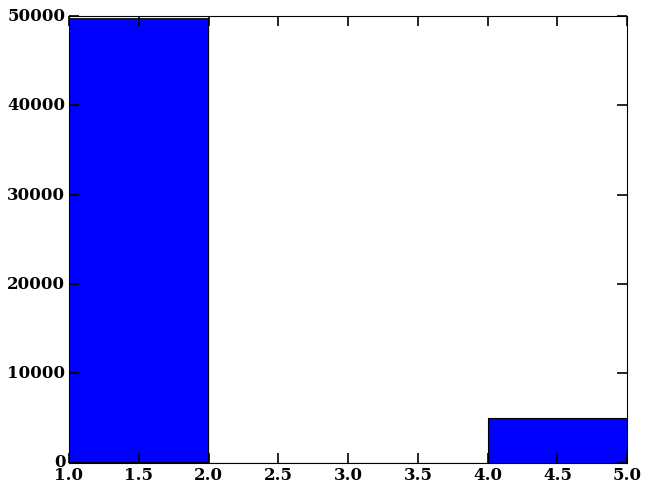

In [13]:
_ = plt.hist(np.array(Rshapes.STATUS), bins=4)

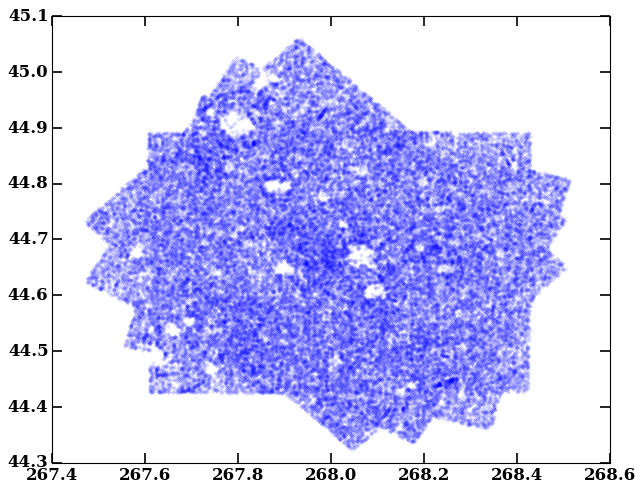

In [24]:
plt.plot(Rshapes.RA, Rshapes.DEC, '.', alpha=0.1)

# Reduce the number of data points
by cutting out some of the outer regions 

recalculate where to cut ...
ref: van Weeren 2012 Fig. 1

In [33]:
# 1 arcmin = 
5.084 * 60  # kpc

305.03999999999996

In [38]:
lower_left = SkyCoord("17h52m40s", "44d35m30s")
upper_right = SkyCoord("17h51m40s", "44d45m30s")

In [47]:
ra_upper = lower_left.ra.deg
ra_lower = upper_right.ra.deg
dec_lower = lower_left.dec.deg
dec_upper = upper_right.dec.deg

print ra_lower, ra_upper
print dec_lower, dec_upper

267.916666667 268.166666667
44.5916666667 44.7583333333


In [48]:
Rshapes = Rshapes[np.logical_and(Rshapes.RA > ra_lower, 
                                 Rshapes.RA < ra_upper)]
Rshapes = Rshapes[np.logical_and(Rshapes.DEC > dec_lower,
                                 Rshapes.DEC < dec_upper)]

In [49]:
Rshapes.shape

(5355, 13)

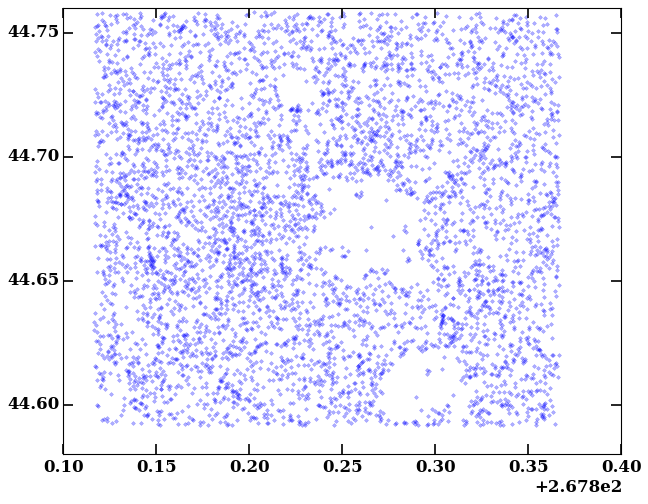

In [54]:
plt.plot(Rshapes.RA, Rshapes.DEC, '.', alpha=0.3)

In [56]:
Rshapes.reset_index()
Rshapes.to_hdf("../../Data/Subaru_data/Rshape_processed.h5", "df")